In [138]:
import numpy as np
import pandas as pd

      
df = pd.read_csv('movie_review.csv')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [139]:
len(df)

64720

In [140]:
print(df['text'][40000]) # Посмотрим, как выглядит любой отзыв

all in all , this movie believes itself to be a clever , humorous and edgy look behind the closed doors of hollywood , but comes across as a boring , stupid and completely unentertaining piece of shite .


In [141]:
# Посмотрим, какие у нас есть отзывы:
df['tag'].unique()

array(['pos', 'neg'], dtype=object)

У нас действительно есть только позитивные или негативные отзывы, нейтральных нет

In [142]:
# Теперь посмотрим, сколько позитивных и негативных рецензий:

df['tag'].value_counts()

pos    32937
neg    31783
Name: tag, dtype: int64

In [143]:
# Убираем лишние колонки

df = df.drop(['fold_id','cv_tag','html_id', 'sent_id'], axis=1)

display(df)

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [144]:
# Для удобства переименовывем колонки

df = df.rename(columns={"tag": "review"})
display(df)

,text,review
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


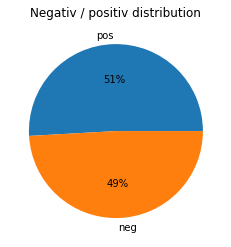

In [145]:
# Визуализируем распределение позитивных и негативных

import matplotlib.pyplot as plt

classes = pd.value_counts(df["review"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 

plt.title("Negativ / positiv distribution")

plt.ylabel('')

plt.show()

In [146]:
df["review"]=df["review"].map({'pos':1,'neg':0}) 
df      

,text,review
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,"after watching one of the "" roxbury "" skits on...",0
64718,"bump unsuspecting women , and . . . that's all .",0


In [147]:
# Проверм, нет ли в нашем датасете нулевых значений

df.isnull().sum() 

text      0
review    0
dtype: int64

In [148]:
# Нулевых значений не оказалось, но на всякий случай вставим строчку для удаления

df.dropna(inplace=True)

In [149]:
len(df)

64720

In [150]:
# Теперь удаляем пропуски, если они имеются.  

blanks = list()  

for i,tx,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():        
            blanks.append(i)        


In [151]:
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


Пробелов не казалось, тогда идем дальше.

# Теперь переходим непосредственно к тренировке модели.

# Делаем векторизацию и делим наш датафрейм на тренировочные и тестовые данные

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

text_clf_vec = TfidfVectorizer()   

text_clf_mx = text_clf_vec.fit_transform(df['text'])  


In [153]:
text_clf_mx.shape

(64720, 39659)

In [154]:
from sklearn.model_selection import train_test_split

X = text_clf_mx
y = df['review']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [155]:
text_clf_nb = MultinomialNB()
text_clf_nb.fit(X_train, y_train)

MultinomialNB()

In [156]:
X_train.shape

(43362, 39659)

In [157]:
type(text_clf_nb)

sklearn.naive_bayes.MultinomialNB

# Сделаем прогнозы, проанализируем и сравним результаты

In [158]:
predictions = text_clf_nb.predict(X_test) 

In [159]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7071 3437]
 [2813 8037]]


7071 негативных и 8037 позитивных были правильно спрогнозированы, а 2831 и 3437 неправильно 

In [160]:
# сделаем сводку отчетов
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69     10508
           1       0.70      0.74      0.72     10850

    accuracy                           0.71     21358
   macro avg       0.71      0.71      0.71     21358
weighted avg       0.71      0.71      0.71     21358



precision и recall neg и pos примерно 71%, то есть мы уже более-менее можем предсказать, является ли отзыв отрицательным или положительным, но результат все-таки оставляет желать лучшего.

In [161]:
# Теперь рассмотрим accuracy 
print(metrics.accuracy_score(y_test,predictions))

0.7073696038954959


accuracy_score нам также выдает 70%

# Тогда попробуем метод опорных векторов:

In [162]:
from sklearn.svm import LinearSVC
text_clf_lsvc = LinearSVC()

text_clf_lsvc.fit(X_train, y_train)

LinearSVC()

In [163]:
predictions = text_clf_lsvc.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[7272 3236]
 [3258 7592]]


In [164]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10508
           1       0.70      0.70      0.70     10850

    accuracy                           0.70     21358
   macro avg       0.70      0.70      0.70     21358
weighted avg       0.70      0.70      0.70     21358



In [165]:
print(metrics.accuracy_score(y_test,predictions))

0.6959453132315759


# Метод опорных векторов не дал нам лучшего результата, даже немного хуже. Попробуем удалить стоп-слова:

In [166]:
text_clf_vec = TfidfVectorizer(stop_words="english")  

text_clf_mx = text_clf_vec.fit_transform(df['text'])  

text_clf_lsvc2 = LinearSVC()
text_clf_lsvc2.fit(X_train, y_train)

LinearSVC()

In [167]:
predictions = text_clf_lsvc2.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[7272 3236]
 [3258 7592]]


In [168]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10508
           1       0.70      0.70      0.70     10850

    accuracy                           0.70     21358
   macro avg       0.70      0.70      0.70     21358
weighted avg       0.70      0.70      0.70     21358



In [169]:
print(metrics.accuracy_score(y_test,predictions))

0.6959453132315759


После применения стопслов результат лучше не стал

# Попробуем скормить модели новую рецензию и посмотреть каков будет ответ:

In [170]:
myreview = "A movie I really wanted to love was terrible. I'm sure the producers had the best intentions, but the execution was lacking."

In [171]:
print(text_clf_nb.predict([myreview]))

ValueError: Expected 2D array, got 1D array instead:
array=["A movie I really wanted to love was terrible. I'm sure the producers had the best intentions, but the execution was lacking."].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Если производить подобную векторизацию и трансформацию:

text_clf_vec = TfidfVectorizer()   

text_clf_mx = text_clf_vec.fit_transform(df['text'])  


# То в этом случае выдается ошибка:
ValueError: Expected 2D array, got 1D array instead:
        
# К сожалению не получилось ее исправить, поэтому все делала через Pipeline, см. другую тетрадку